Company_data

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [138]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [139]:
company=pd.read_csv('Company_Data.csv')

EDA

In [140]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [141]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [142]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [143]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [144]:
company.shape

(400, 11)

In [145]:
company.isna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [146]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [147]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [148]:
company.duplicated().sum()

0

In [149]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [150]:
company.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

DATA Visualization

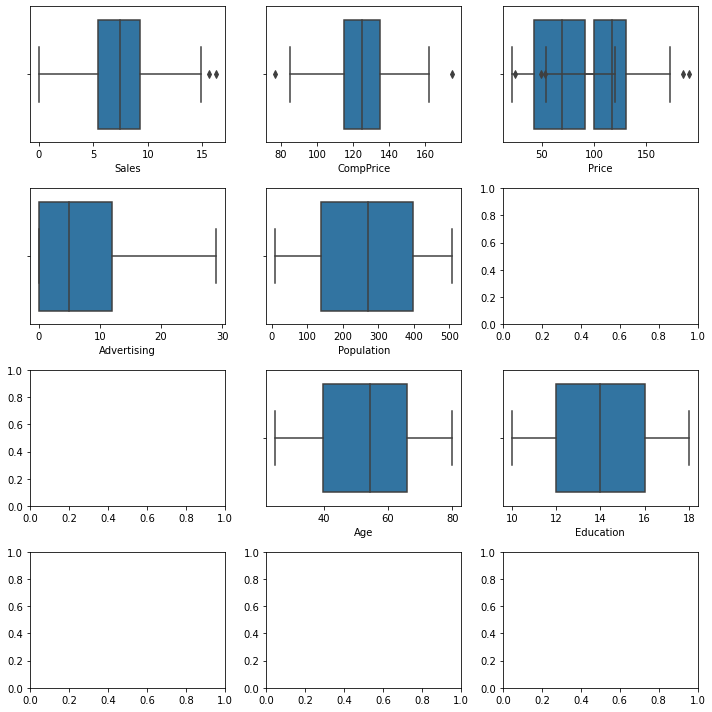

In [151]:
#BoxPlot
fig, ax=plt.subplots(4,3, figsize=(10,10))
sns.boxplot(company.Sales,ax=ax[0,0])
sns.boxplot(company.CompPrice,ax=ax[0,1])
sns.boxplot(company.Income,ax=ax[0,2])
sns.boxplot(company.Advertising,ax=ax[1,0])
sns.boxplot(company.Population,ax=ax[1,1])
sns.boxplot(company.Price,ax=ax[0,2])
sns.boxplot(company.Age,ax=ax[2,1])
sns.boxplot(company.Education,ax=ax[2,2])

plt.tight_layout()
plt.show()

In [152]:
#taking high sales above 7.49 as it is average of Sales
company['sales']=(company['Sales']>7.4)*1
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


Creating numerical variables for categorical data

In [153]:
#label_encoder
label_encoder=preprocessing.LabelEncoder()

In [154]:
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])



In [155]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [156]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


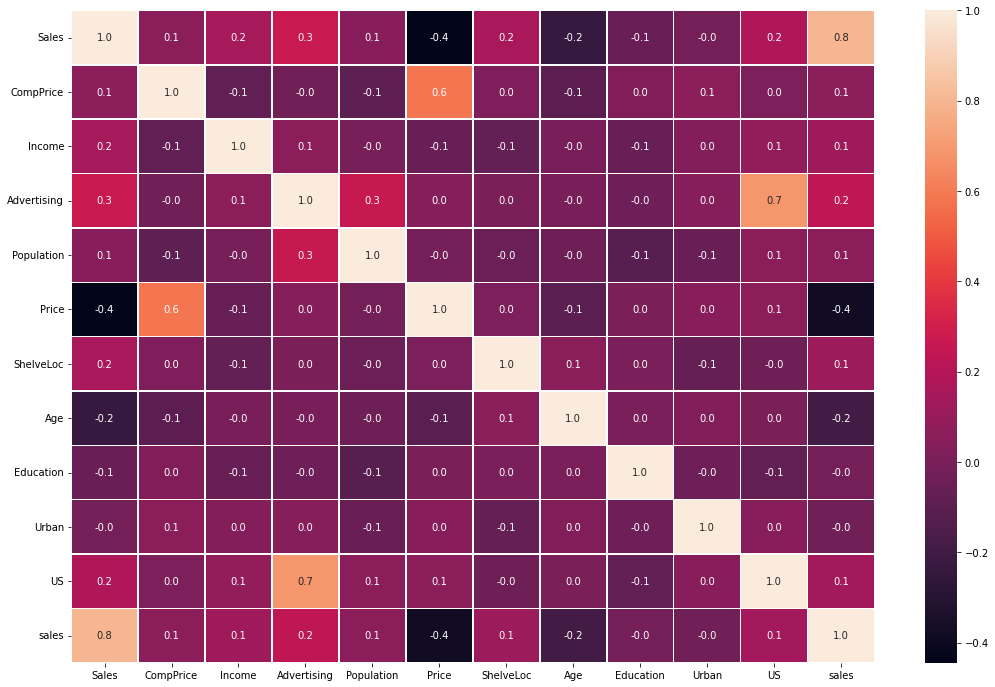

In [157]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(company.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

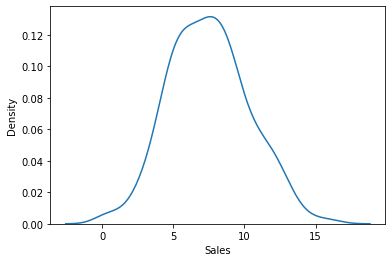

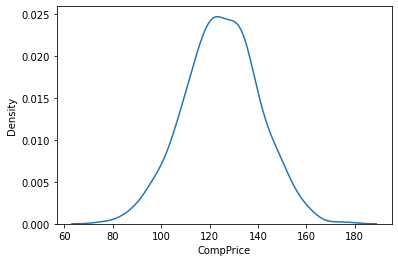

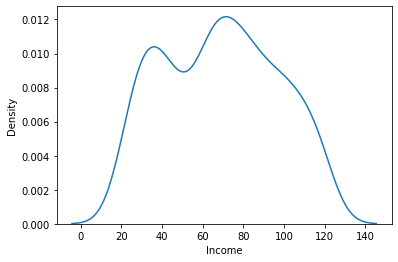

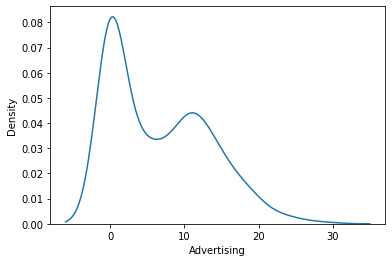

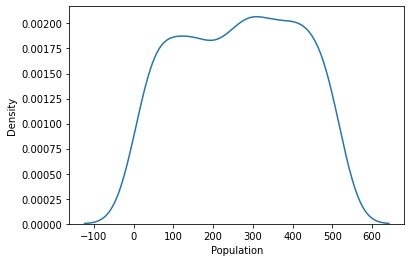

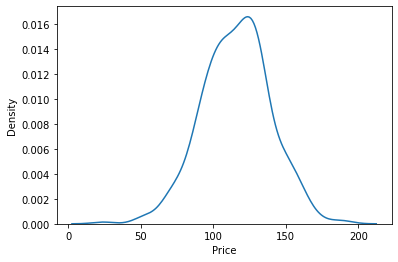

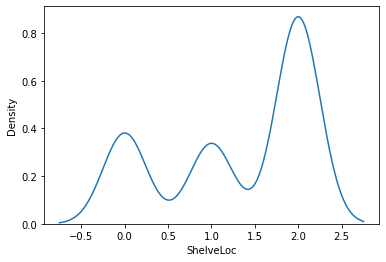

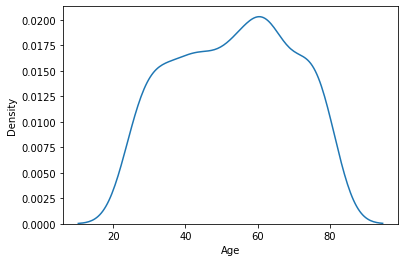

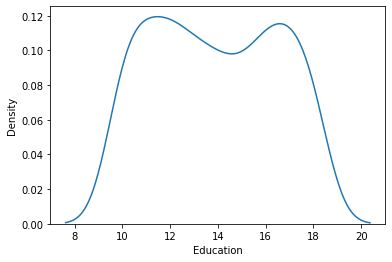

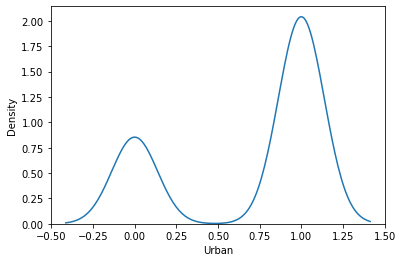

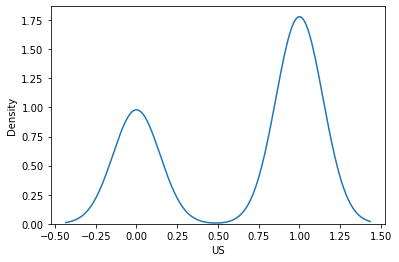

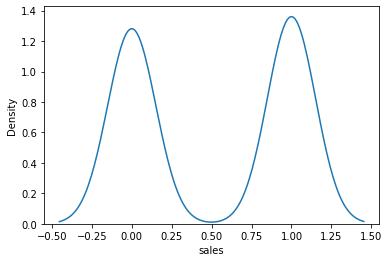

In [158]:
#Kernel density
for n in company.columns:
  sns.kdeplot(company[n])
  plt.show()

Dropping the "Sales" columns from dataset because it is the target variable

In [159]:
#dropping Sales columns
company.drop(['Sales'],axis=1,inplace=True)

In [160]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


Splitting data into dependent and independent variables

In [161]:
x=company.iloc[:,0:10]
y=company.iloc[:,10]

In [162]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: sales, Length: 400, dtype: int64

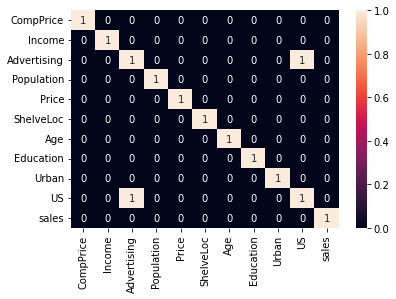

In [163]:
#correlation
sns.heatmap(company.corr()>0.6,annot=True)
plt.show()

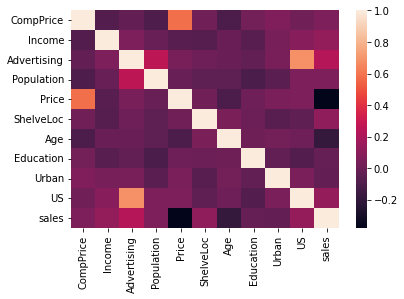

In [164]:
sns.heatmap(company.corr())

Splitting data into training and testing dataset

In [165]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [166]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

PLot the Decision Tree

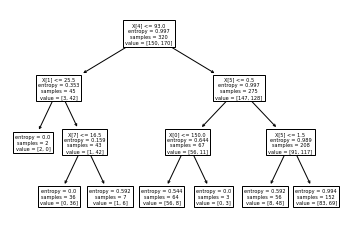

In [167]:
#PLot the decision tree
tree.plot_tree(model);

Visualization of how the data is choosing the root node and how a decision tree classifier is built

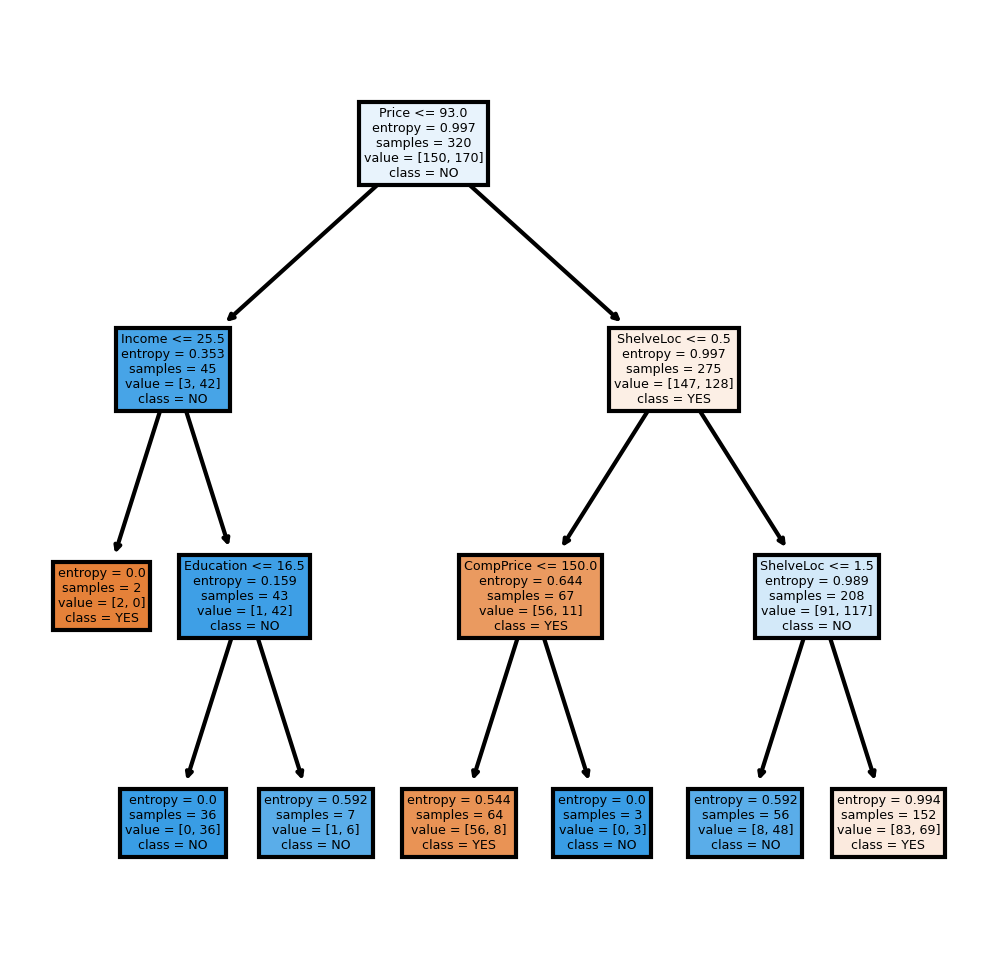

In [168]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Accuracy score of training data

In [169]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.73125

Predicting on the test data

In [170]:
pred=model.predict(x_test)

In [171]:
#accuracy score of predicted
np.mean(pred==y_test)

0.7125

Accuracy score of test data


In [172]:
model.score(x_test,y_test)

0.7125

In [173]:
model.feature_importances_

array([0.08726272, 0.09429533, 0.        , 0.        , 0.3036944 ,
       0.48650471, 0.        , 0.02824283, 0.        , 0.        ])

In [174]:
y_pred=model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7125)

Probabilities of each of the predicted classes

In [175]:
model.predict_proba(x_test)

array([[0.14285714, 0.85714286],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.54605263, 0.45394737],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.875     , 0.125     ],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.14285714, 0.85714286],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.14285714, 0.85714286],
       [0.54605263, 0.45394737],
       [0.54605263, 0.45394737],
       [0.14285714, 0.85714286],
       [0.875     , 0.125     ],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.

In [176]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [177]:
cm

array([[34, 10],
       [13, 23]])

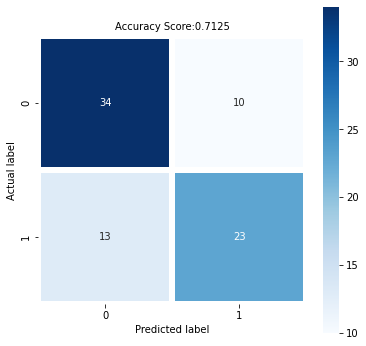

In [178]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidth=5,annot=True,square=True,cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title='Accuracy Score:{0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title,size=10)
plt.show()

In [179]:
#predicted the values of test data
y_pred=model.predict(x_test)
print('Classification report - \n',classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75        44
           1       0.70      0.64      0.67        36

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



DataFrame of train and test accuracy for various max_depth

In [180]:
train_accuracy=[]
test_accuracy=[]
for max_depth in range(1,11):
   model=DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=40)
   model.fit(x_train,y_train)
   train_accuracy.append(model.score(x_train,y_train))
   test_accuracy.append(model.score(x_test,y_test))

In [181]:
train_accuracy

[0.590625,
 0.678125,
 0.73125,
 0.80625,
 0.83125,
 0.903125,
 0.934375,
 0.98125,
 0.99375,
 1.0]

In [182]:
test_accuracy

[0.675, 0.5375, 0.7125, 0.65, 0.675, 0.6875, 0.675, 0.7125, 0.7125, 0.725]

Creating train_accuracy and tes_accuracy DataFrame for various max_depth

In [183]:
accuracies=pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy,'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.590625,0.6750
1,2,0.678125,0.5375
2,3,0.731250,0.7125
3,4,0.806250,0.6500
4,5,0.831250,0.6750
5,6,0.903125,0.6875
6,7,0.934375,0.6750
7,8,0.981250,0.7125
8,9,0.993750,0.7125
9,10,1.000000,0.7250


Visualizing accuracy score for various max_depth

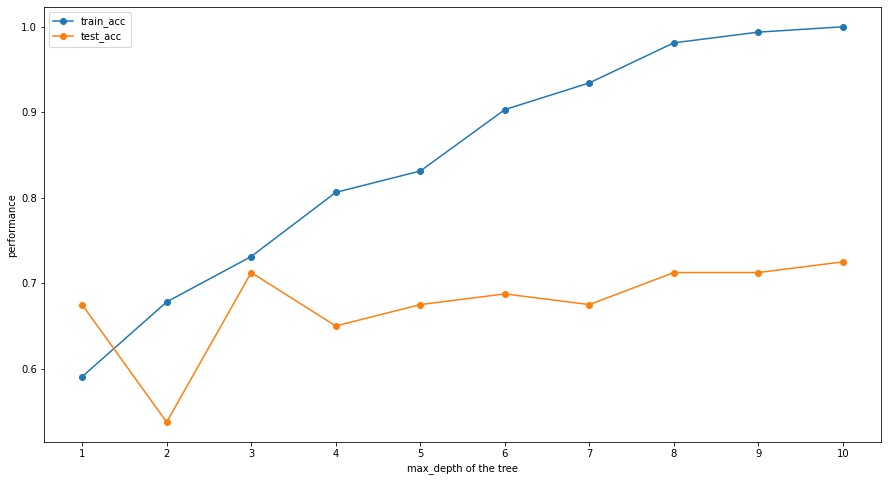

In [184]:
labels=['train_acc','test_acc']
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'],marker='o')
plt.plot(accuracies['max_depth'],accuracies['test_acc'],marker='o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

Splitting the train and test data with different train_test split

In [185]:
array=company.values
X=array[:,0:10]
Y=array[:,10]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Building Decision Tree to predict 

In [187]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [188]:
#Find the accuracy
model.score(X_test,y_test)

-0.2753623188405798

Therefore,when the max_depth of the decision tree is 10,then the accuracy of the classification algorithm is 72.50% and by Decision tree model we have lower accuracy,so we can't recommend this model for classification of company data. 







Fraud_data

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [190]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (2).csv


In [191]:
fraud=pd.read_csv('Fraud_check.csv')

EDA

In [192]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [193]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [194]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [195]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [196]:
fraud.shape

(600, 6)

In [197]:
fraud.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [198]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [199]:
fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [200]:
fraud.duplicated().sum()

0

In [201]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [202]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [203]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

Data Visualization

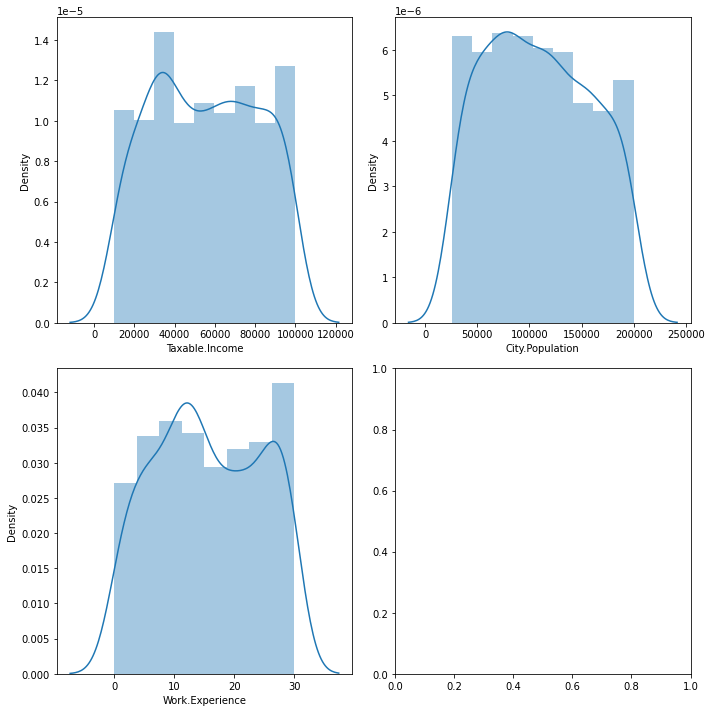

In [204]:
fig, ax=plt.subplots(2,2,figsize=(10,10))

sns.distplot(fraud["Taxable.Income"],ax=ax[0,0])
sns.distplot(fraud["City.Population"],ax=ax[0,1])
sns.distplot(fraud["Work.Experience"],ax=ax[1,0])

plt.tight_layout()
plt.show()

Creating numerical variables for categorical variables

In [205]:
#label encoding
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [206]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


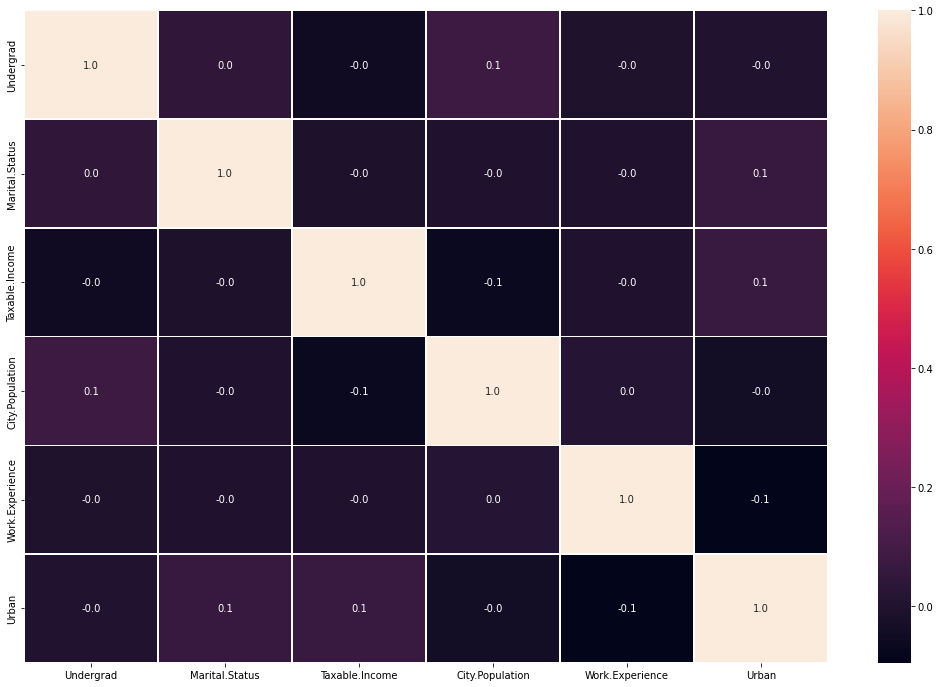

In [207]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(fraud.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

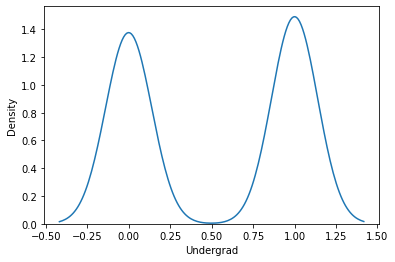

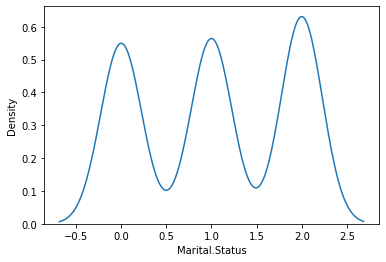

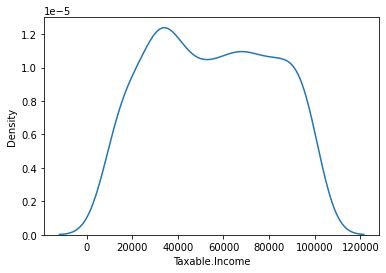

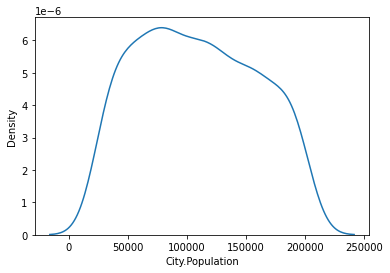

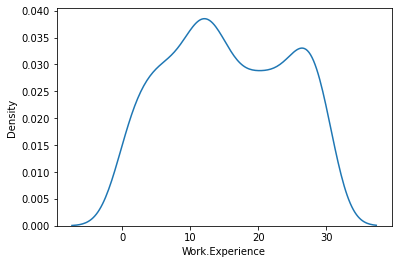

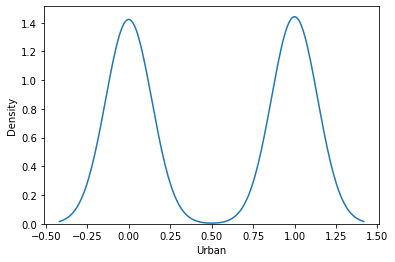

In [208]:
#Kernel density
for n in fraud.columns:
  sns.kdeplot(fraud[n])
  plt.show()

Taking high income above 30000

In [209]:
fraud['Taxable.Income']=(fraud['Taxable.Income']>30000)*1

In [210]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


Dropping the taxable income column from dataset,since it is target variable

In [211]:
x=fraud.drop(axis=1,columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [212]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

Splitting data into train and test dataset

In [213]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using gini index

In [214]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

plot the Decision tree

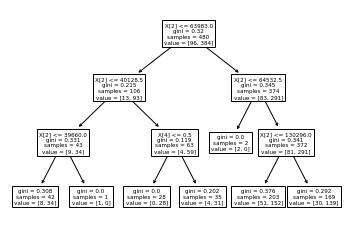

In [215]:
#PLot the decision tree
tree.plot_tree(model);

Visualization of how the data is choosing the root node and how a decision tree classifier is built

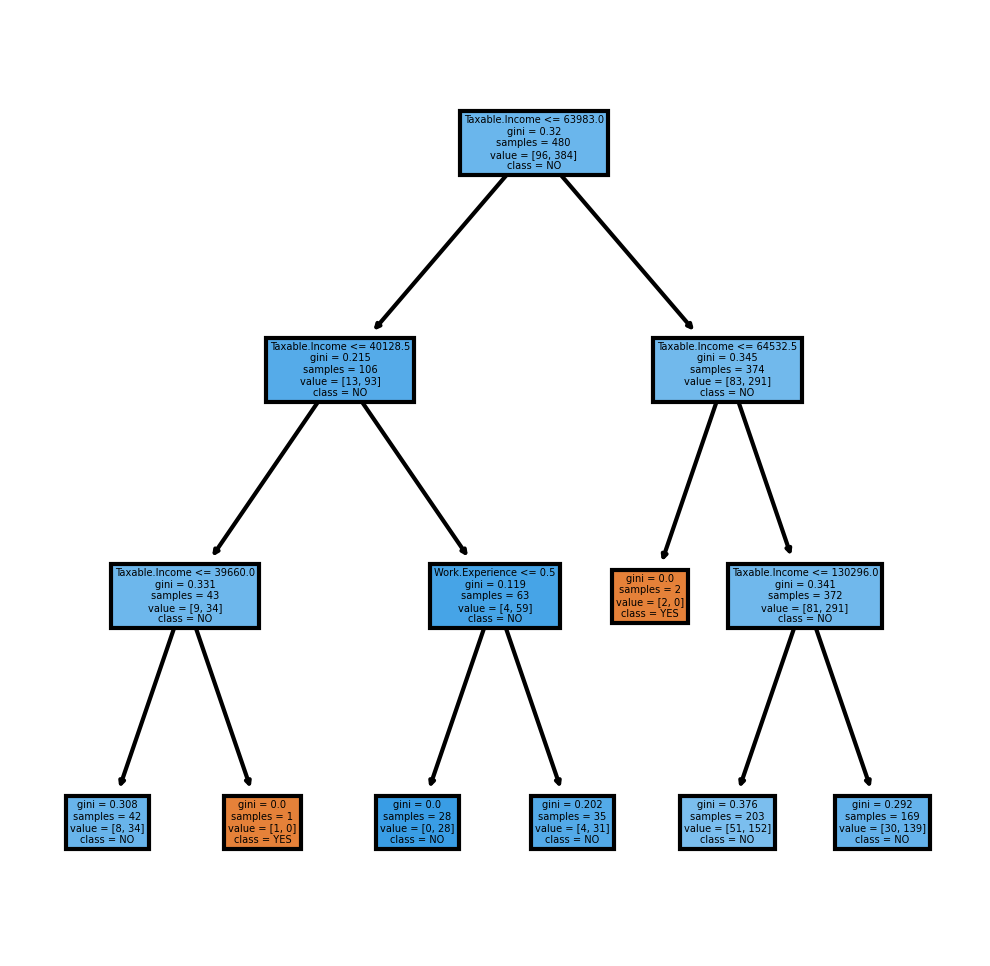

In [216]:
fn=['Undergard','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Accuracy score training data

In [217]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.80625

Accuracy score of test data

In [218]:
model.score(x_test,y_test)

0.7583333333333333

In [219]:
model.feature_importances_

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])

In [220]:
y_pred=model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7583333333333333)

Probabilities of each of the predicted classes

In [221]:
model.predict_proba(x_test)

array([[0.19047619, 0.80952381],
       [0.19047619, 0.80952381],
       [0.25123153, 0.74876847],
       [0.17751479, 0.82248521],
       [0.25123153, 0.74876847],
       [0.19047619, 0.80952381],
       [0.        , 1.        ],
       [0.25123153, 0.74876847],
       [0.11428571, 0.88571429],
       [0.        , 1.        ],
       [0.17751479, 0.82248521],
       [0.19047619, 0.80952381],
       [0.17751479, 0.82248521],
       [0.        , 1.        ],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.25123153, 0.74876847],
       [1.        , 0.        ],
       [0.25123153, 0.74876847],
       [0.11428571, 0.88571429],
       [0.        , 1.        ],
       [0.25123153, 0.74876847],
       [0.25123153, 0.74876847],
       [0.25123153, 0.74876847],
       [0.19047619, 0.80952381],
       [0.25123153, 0.74876847],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.

In [222]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [223]:
cm

array([[ 0, 28],
       [ 1, 91]])

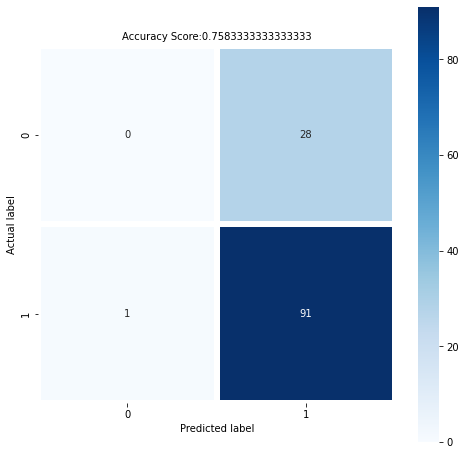

In [224]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidth=5,annot=True,square=True,cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title='Accuracy Score:{0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title,size=10)
plt.show()

In [225]:
#predicted the values of test data
y_pred=model.predict(x_test)
print('Classification report - \n',classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.76      0.99      0.86        92

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



DataFrame of train anfd test accuracy for various max_depth

In [226]:
train_accuracy=[]
test_accuracy=[]
for max_depth in range(1,11):
   model=DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=40)
   model.fit(x_train,y_train)
   train_accuracy.append(model.score(x_train,y_train))
   test_accuracy.append(model.score(x_test,y_test))

In [227]:
train_accuracy

[0.8,
 0.8041666666666667,
 0.8041666666666667,
 0.8104166666666667,
 0.8229166666666666,
 0.83125,
 0.8416666666666667,
 0.8541666666666666,
 0.8666666666666667,
 0.875]

In [228]:
test_accuracy

[0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7583333333333333,
 0.775,
 0.75,
 0.7333333333333333,
 0.7333333333333333,
 0.725,
 0.7333333333333333]

Creating train_accuracy and tes_accuracy DataFrame for various max_depth

In [229]:
accuracies=pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy,'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.800000,0.766667
1,2,0.804167,0.766667
2,3,0.804167,0.766667
3,4,0.810417,0.758333
4,5,0.822917,0.775000
5,6,0.831250,0.750000
6,7,0.841667,0.733333
7,8,0.854167,0.733333
8,9,0.866667,0.725000
9,10,0.875000,0.733333


Visualizing accuracy score for various max_depth

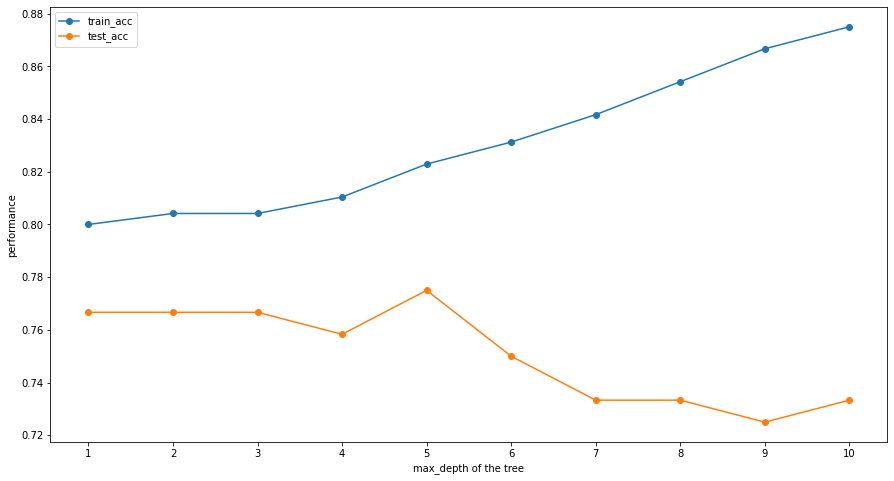

In [230]:
labels=['train_acc','test_acc']
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'],marker='o')
plt.plot(accuracies['max_depth'],accuracies['test_acc'],marker='o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

Splitting train and test data with different train-test_split

In [231]:
X=fraud.drop(axis=1,columns="Taxable.Income")
Y=fraud["Taxable.Income"]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Building Decision tree to predict

In [233]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [234]:
#Find the accuracy
model.score(X_test,y_test)

-1.1303797468354437

Therefore,when the max_depth of the decision tree is 5,then the accuracy score of the classificaton algorithm is 77.50% and by Decision tree model we have lower accuracy score,so this model is not recommendable for classification of fraud_data.